<a href="https://colab.research.google.com/github/Henrique0078/Base_credit_python/blob/main/Base_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Base de Dados Credito
Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

# Importações

In [ ]:
!pip install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 30.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Exploração dos dados

In [ ]:
base_credito = pd.read_csv('/content/credit_data.csv')

In [ ]:
base_credito

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
base_credito.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [ ]:
base_credito.tail(8)

,clientid,income,age,loan,default
1992,1993,30803.806165,23.250084,623.024153,0
1993,1994,54421.410155,26.821928,3273.631823,0
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [ ]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [ ]:
base_credito[base_credito['income'] >= 69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [ ]:
base_credito[base_credito['loan'] <= 1.377630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


In [ ]:
base_credito[base_credito['income'] <= 20015]

,clientid,income,age,loan,default
1452,1453,20014.48947,43.202204,2426.306223,0


Visualização dos dados

In [ ]:
np.unique(base_credito['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

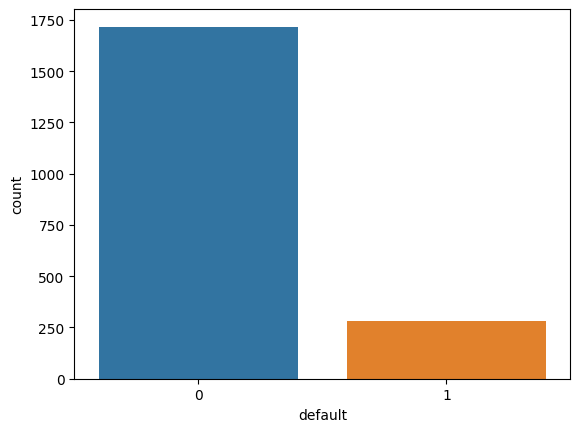

In [ ]:
sns.countplot(x = base_credito['default']);

sns é biblioteca para visualizacao do dado em grafico, sem ponto e virgula mostra um texto da biblioteca, quando bota esse texto some


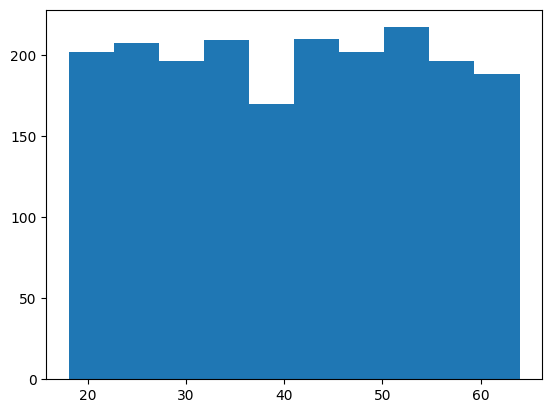

In [ ]:
plt.hist(x = base_credito['age']);

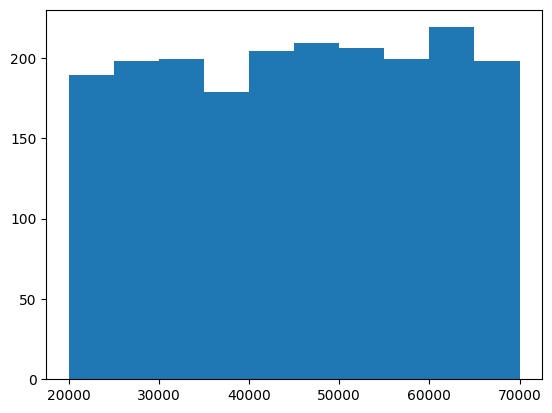

In [ ]:
plt.hist(x = base_credito['income']);

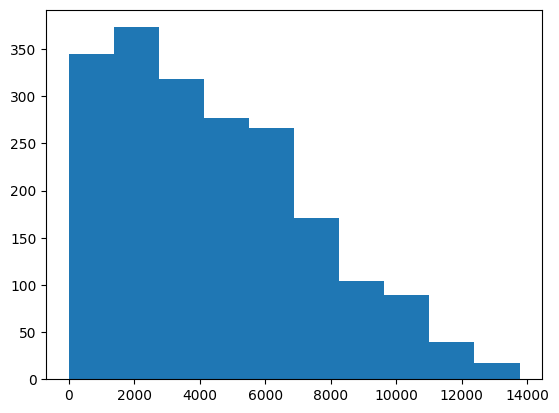

In [ ]:
plt.hist(x = base_credito['loan']);

In [ ]:
grafico = px.scatter_matrix(base_credito, dimensions=['age', 'income', 'loan'], color = 'default')
grafico.show()

Tratamento de valores inconsistentes

In [ ]:
base_credito.loc[base_credito['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
base_credito[base_credito['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
# Apagar a coluna inteira (de todos os registros da base de dados)
base_credito2 = base_credito.drop('age', axis = 1)
base_credito2

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [ ]:
base_credito[base_credito['age'] < 0].index

Int64Index([15, 21, 26], dtype='int64')

Aqui ele ta retornando o indice dos registros que são compativeis com as condicoes

In [ ]:
# Apagar somente os registros com valores incosistentes
base_credito3 = base_credito.drop(base_credito[base_credito['age'] < 0].index)
# Sem o .index nao funfa pq ele nao ta aceitando como referencia suficiente,
# ai quando adiciona o index retorna o valor exato do indice dos registros desejados na consulta.
base_credito3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
base_credito3[base_credito3['age'] < 0]

,clientid,income,age,loan,default


In [ ]:
# Preencher os valores inconsistentes manualmente
# Seja entrando em contato com o cliente para manutencao do dado ou afins

In [ ]:
# Preencher os valores inconsistentes com a média com a media da base sem os valores inconsistentes
base_credito3['age'].mean()
base_credito['age'][base_credito['age'] > 0].mean()

40.92770044906149

In [ ]:
base_credito.loc[base_credito['age'] < 0, 'age'] = 40.92

In [ ]:
base_credito[base_credito['age'] < 0]

,clientid,income,age,loan,default


In [ ]:
base_credito.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


Tratamento de valores faltantes

In [ ]:
base_credito.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [ ]:
base_credito.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
base_credito.loc[pd.isnull(base_credito['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
base_credito['age'].fillna(base_credito['age'].mean(), inplace = True)
#inplace serve para alterar a base de dados nao só gerar uma tabela temporaria

In [ ]:
base_credito.loc[pd.isnull(base_credito['age'])]

,clientid,income,age,loan,default


In [ ]:
base_credito.loc[(base_credito['clientid'] > 27) & (base_credito['clientid'] < 32)]

,clientid,income,age,loan,default
27,28,45727.459870,55.839922,6376.822949,0
28,29,59417.805406,40.927689,2082.625938,0
29,30,58842.891308,54.510948,10871.186790,0
30,31,48528.852796,40.927689,6155.784670,0


In [ ]:
base_credito.loc[base_credito['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


Divisão entre previsores e classe

In [ ]:
# X é os previsores
x_credito = base_credito.iloc[:, 1:4].values

In [ ]:
x_credito

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
type(x_credito)

numpy.ndarray

In [ ]:
# Y é a classe
y_credito = base_credito.iloc[:, 4].values

In [ ]:
y_credito

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
type(y_credito)

numpy.ndarray

Escalonamento dos valores

In [ ]:
x_credito

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
x_credito[:, 0].min(), x_credito[:, 1].min(), x_credito[:, 2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [ ]:
x_credito[:, 0].max(), x_credito[:, 1].max(), x_credito[:, 2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credito = StandardScaler()
x_credito = scaler_credito.fit_transform(x_credito)

In [ ]:
x_credito[:, 0].min(), x_credito[:, 1].min(), x_credito[:, 2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [ ]:
x_credito[:, 0].max(), x_credito[:, 1].max(), x_credito[:, 2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

In [ ]:
# Valores escalonados
x_credito

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

Divisão das bases em treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_credito_treinamento, x_credito_teste, y_credito_treinamento, y_credito_teste = train_test_split(x_credito, y_credito, test_size = 0.25, random_state = 0)

In [ ]:
x_credito_treinamento.shape, y_credito_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

Salvar as variaveis

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([x_credito_treinamento, y_credito_treinamento, x_credito_teste, y_credito_teste], f)

# Naive bayes 93.80%

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Base risco de crédito

In [ ]:
base_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [ ]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
x_risco_credito = base_risco_credito.iloc[:, 0:4].values
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enconder_historia = LabelEncoder()
label_enconder_divida = LabelEncoder()
label_enconder_garantia = LabelEncoder()
label_enconder_renda = LabelEncoder()

In [ ]:
x_risco_credito[:, 0] = label_enconder_historia.fit_transform(x_risco_credito[:, 0])
x_risco_credito[:, 1] = label_enconder_divida.fit_transform(x_risco_credito[:, 1])
x_risco_credito[:, 2] = label_enconder_garantia.fit_transform(x_risco_credito[:, 2])
x_risco_credito[:, 3] = label_enconder_renda.fit_transform(x_risco_credito[:, 3])

In [ ]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito], f)

Naive

In [ ]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(x_risco_credito, y_risco_credito)

GaussianNB()

In [ ]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)

previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [ ]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [ ]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

In [ ]:
accuracy_score(y_risco_credito, previsao)

ValueError: ignored

# Base de credito

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credito_treinamento, y_credito_treinamento, x_credito_teste, y_credito_teste = pickle.load(f)

In [ ]:
x_credito_treinamento.shape, y_credito_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

In [ ]:
naive_credito_data = GaussianNB()
naive_credito_data.fit(x_credito_treinamento, y_credito_treinamento)

GaussianNB()

In [ ]:
previsoes = naive_credito_data.predict(x_credito_teste)

In [ ]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_credito_teste, previsoes)

0.938

In [ ]:
confusion_matrix(y_credito_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [ ]:
 from yellowbrick.classifier import ConfusionMatrix

0.938

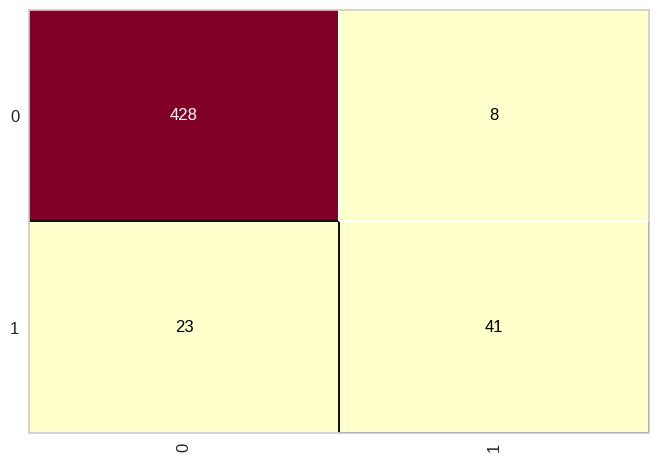

In [ ]:
cm = ConfusionMatrix(naive_credito_data)
cm.fit(x_credito_treinamento, y_credito_treinamento)
cm.score(x_credito_teste, y_credito_teste)

In [ ]:
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



# Arvore de decisão 98.20%

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  x_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
arvore_risco_credito.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

In [ ]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

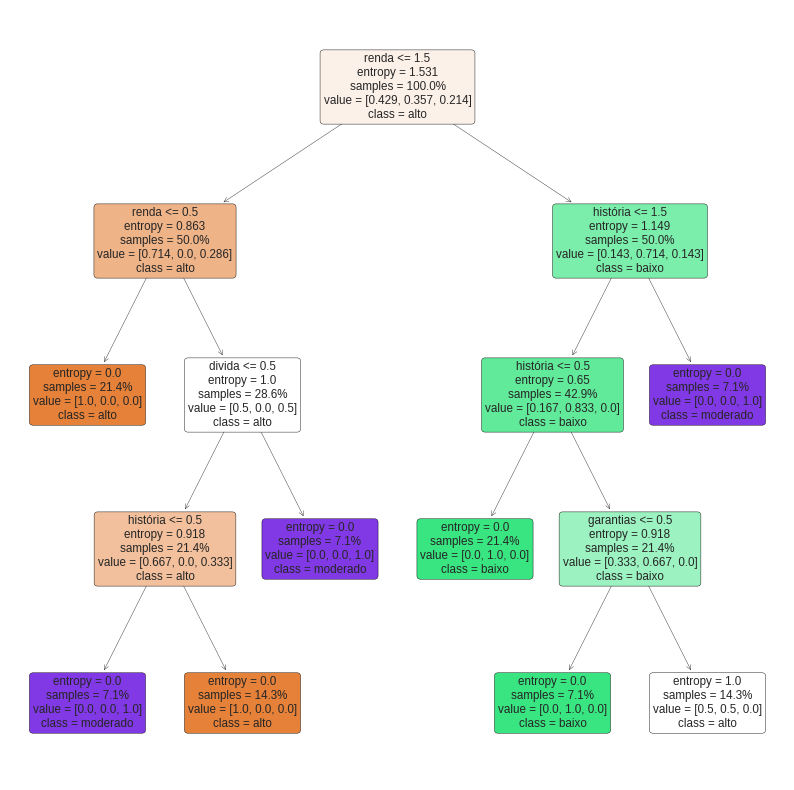

In [ ]:
from sklearn import tree
previsores = ['história', 'divida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True, proportion=True, rounded=True);

In [ ]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)

previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

Base Crédito

In [ ]:
with open('credit.pkl', 'rb') as f:
  x_credito_treinamento, y_credito_treinamento, x_credito_teste, y_credito_teste = pickle.load(f)

In [ ]:
x_credito_treinamento.shape, y_credito_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

In [ ]:
arvore_credito = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_credito.fit(x_credito_treinamento, y_credito_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
arvore_credito.feature_importances_

array([0.21219711, 0.39503611, 0.39276678])

In [ ]:
arvore_credito.classes_

array([0, 1])

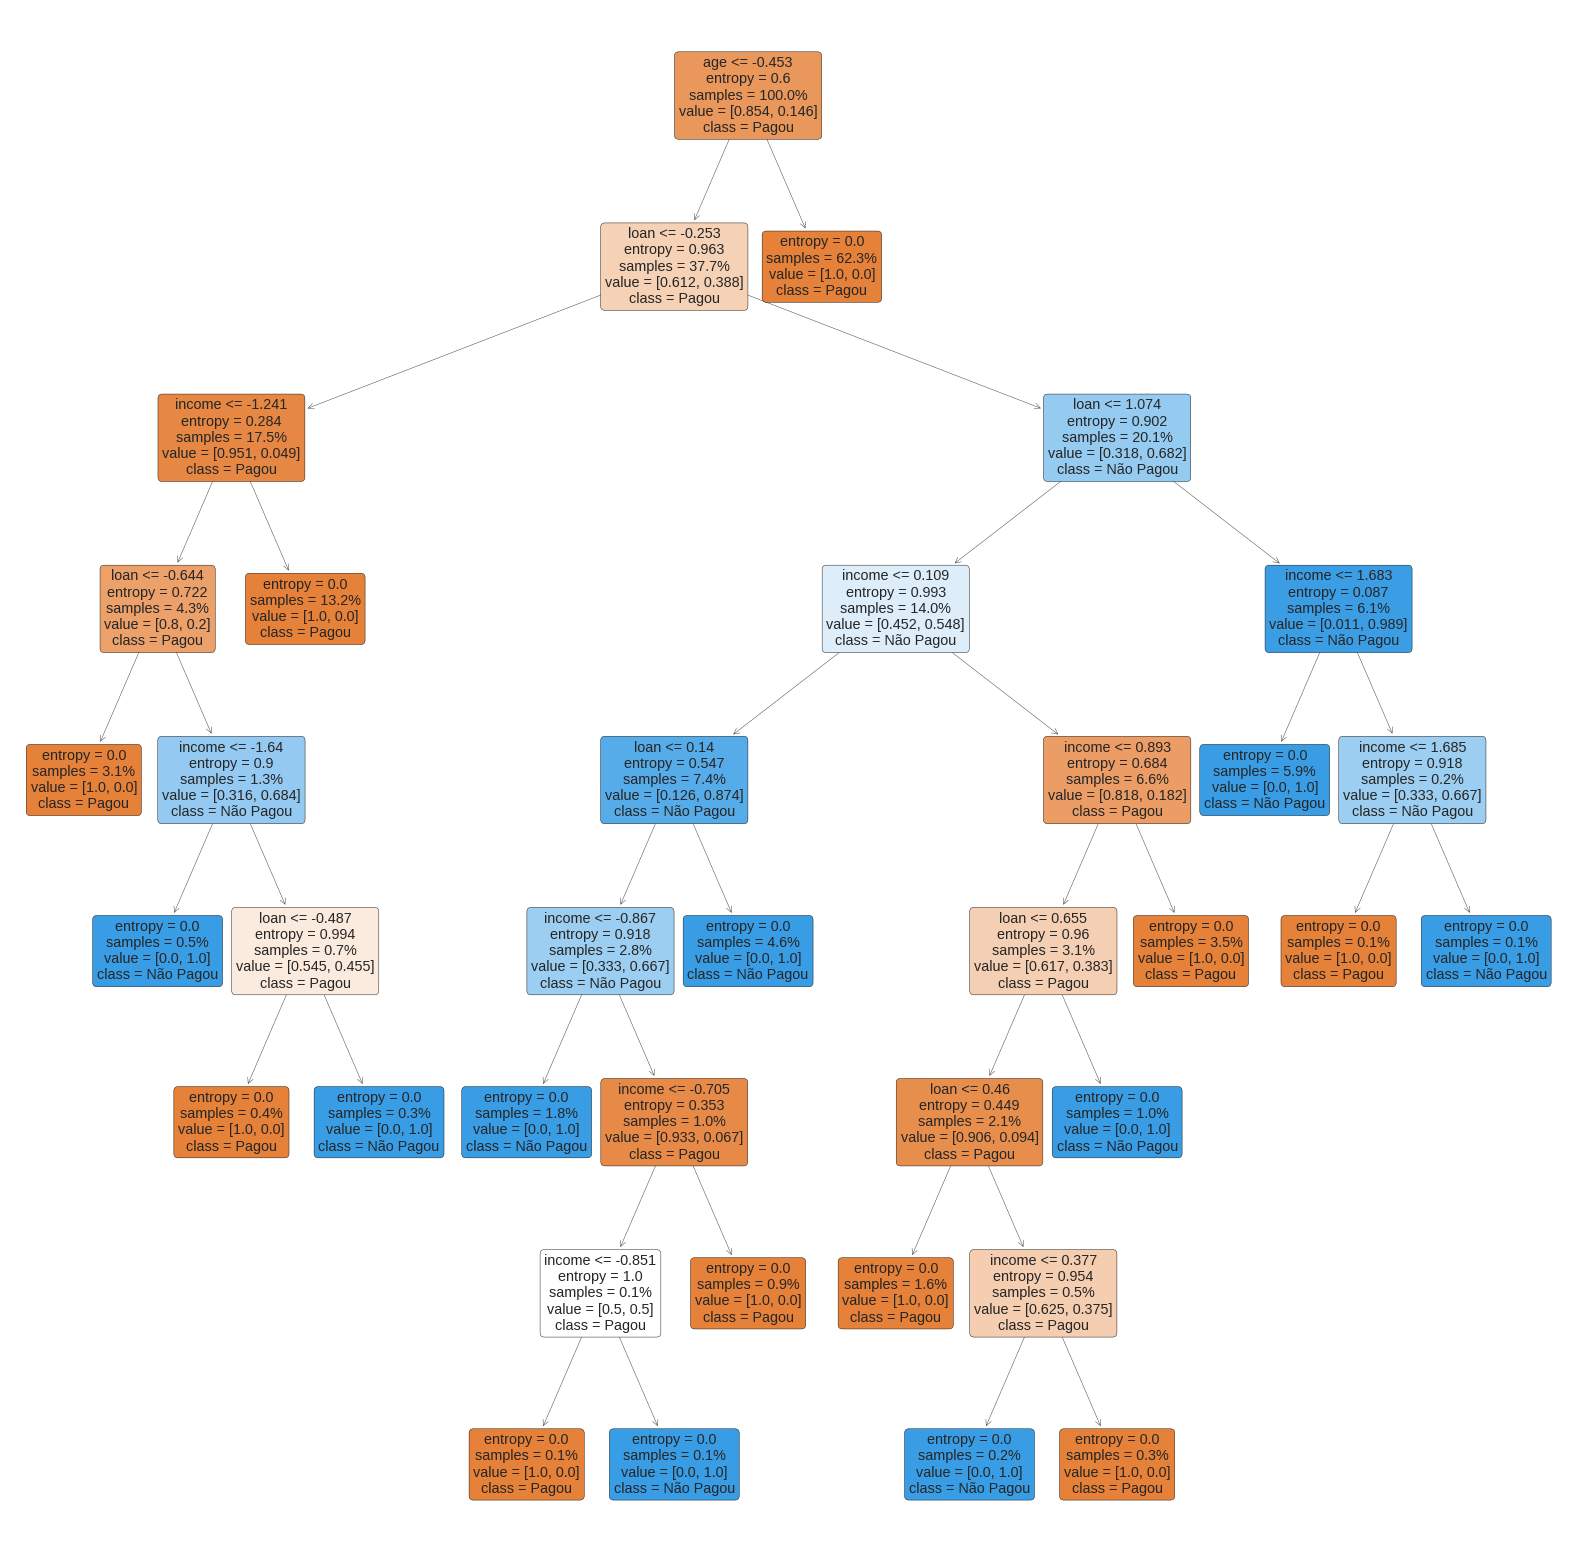

In [ ]:
classes = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 20))
tree.plot_tree(arvore_credito, feature_names=classes, class_names=['Pagou', 'Não Pagou'], filled=True, proportion=True, rounded=True);
fig.savefig('Arvore_credito.png')

In [ ]:
resultado = arvore_credito.predict(x_credito_teste)
resultado

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(resultado, y_credito_teste)

0.982

In [ ]:
print(classification_report(resultado, y_credito_teste))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       433
           1       0.95      0.91      0.93        67

    accuracy                           0.98       500
   macro avg       0.97      0.95      0.96       500
weighted avg       0.98      0.98      0.98       500



0.982

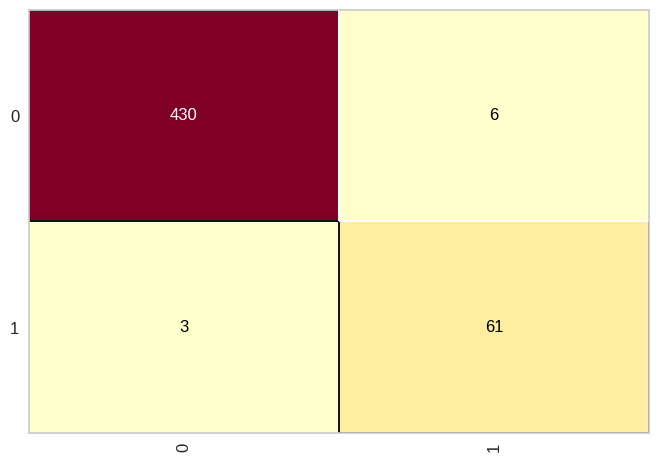

In [ ]:
confusao = ConfusionMatrix(arvore_credito)
confusao.fit(x_credito_treinamento, y_credito_treinamento)
confusao.score(x_credito_teste, y_credito_teste)

# Random Forest 98.40%

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  (x_credito_treinamento, y_credito_treinamento, x_credito_teste, y_credito_teste) = pickle.load(f)

In [ ]:
random_forest_credito = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)

In [ ]:
random_forest_credito.fit(x_credito_treinamento, y_credito_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [ ]:
previsoes = random_forest_credito.predict(x_credito_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(previsoes, y_credito_teste)

0.984

In [ ]:
print(classification_report(previsoes, y_credito_teste))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       438
           1       0.92      0.95      0.94        62

    accuracy                           0.98       500
   macro avg       0.96      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



0.984

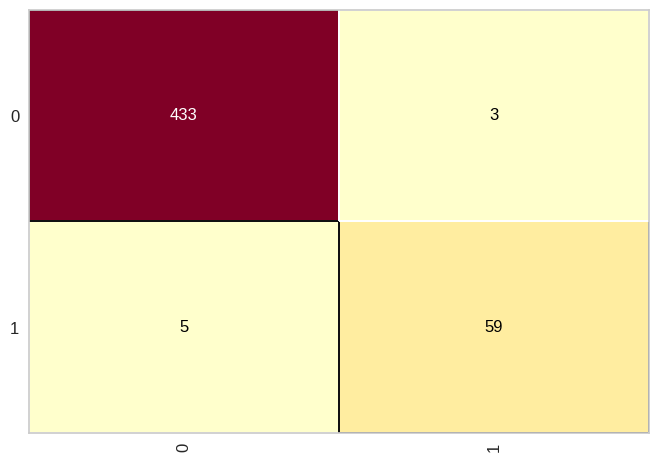

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusao = ConfusionMatrix(random_forest_credito)
confusao.fit(x_credito_treinamento, y_credito_treinamento)
confusao.score(x_credito_teste, y_credito_teste)

# Regras 97.40%

In [ ]:
!pip install Orange3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.4/506.4 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.0/262.0 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.0/961.0 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import Orange

Base Risco Crédito

In [ ]:
base_risco_credito = Orange.data.Table('risco_credito_regras.csv')

In [ ]:
base_risco_credito

[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

In [ ]:
base_risco_credito.domain

[historia, divida, garantias, renda | risco]

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [ ]:
for regras in regras_risco_credito.rule_list:
  print(regras)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=baixo 
IF TRUE THEN risco=alto 


In [ ]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'],['ruim', 'alta', 'adequada', '0_15']])
previsoes

array([1, 0])

In [ ]:
base_risco_credito.domain.class_var.values

('alto', 'baixo', 'moderado')

In [ ]:
for i in previsoes:
  #print(i)
  print(base_risco_credito.domain.class_var.values[i])

baixo
alto


Base Crédito

In [ ]:
base_credito = Orange.data.Table('credit_data_regras.csv')

In [ ]:
base_credito.domain

[income, age, loan | default]

In [ ]:
base_dividida = Orange.evaluation.testing.sample(base_credito, n = 0.25)

In [ ]:
base_dividida

([[23516.7, 27.3627, 559.905 | 0],
  [65077.3, 50.9791, 11061.8 | 0],
  [21451.5, 52.184, 1719.04 | 0],
  [52218.9, 37.5428, 9792.09 | 0],
  [58122, 58.3638, 5161.11 | 0],
  ...
 ],
 [[24830.2, 28.9702, 2046.69 | 0],
  [34723, 22.2234, 4073.41 | 0],
  [46766.6, 47.7752, 2383.41 | 0],
  [26581.6, 61.9534, 5090.39 | 0],
  [67420.6, 21.1853, 3668.99 | 0],
  ...
 ])

In [ ]:
base_dividida[0]

[[23516.7, 27.3627, 559.905 | 0],
 [65077.3, 50.9791, 11061.8 | 0],
 [21451.5, 52.184, 1719.04 | 0],
 [52218.9, 37.5428, 9792.09 | 0],
 [58122, 58.3638, 5161.11 | 0],
 ...
]

In [ ]:
base_dividida[1]

[[24830.2, 28.9702, 2046.69 | 0],
 [34723, 22.2234, 4073.41 | 0],
 [46766.6, 47.7752, 2383.41 | 0],
 [26581.6, 61.9534, 5090.39 | 0],
 [67420.6, 21.1853, 3668.99 | 0],
 ...
]

In [ ]:
base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [ ]:
len(base_treinamento), len(base_teste)

(1500, 500)

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credito = cn2(base_treinamento)

In [ ]:
for regras in regras_credito.rule_list:
  print(regras)

IF age>=34.9257164876908 THEN default=0 
IF loan<=2507.64970973955 AND income>=20511.4294355735 THEN default=0 
IF loan>=8045.4409532236705 AND age>=18.1760434475727 THEN default=1 
IF income>=58132.4712652713 THEN default=0 
IF loan>=5659.509277874139 AND age>=29.636369307525502 THEN default=1 
IF loan>=5659.509277874139 AND age>=29.417216334492 THEN default=0 
IF loan>=5659.509277874139 AND income>=54739.164519123704 THEN default=1 
IF income>=52841.5164374746 THEN default=0 
IF loan>=5659.509277874139 THEN default=1 
IF income<=31702.3342987522 AND loan>=3665.88089899456 THEN default=1 
IF age<=18.9473467003554 AND income>=34667.0204005204 THEN default=0 
IF income>=41019.5487947203 AND income>=45971.133494749694 THEN default=0 
IF age>=34.7410444347188 THEN default=0 
IF age>=34.669146894011604 THEN default=1 
IF age>=33.4312054850161 THEN default=0 
IF income<=24857.6948815025 AND age>=23.238169600255798 THEN default=1 
IF loan>=4849.33378471958 AND loan>=5282.728560308379 THEN de

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_credito])

In [ ]:
previsoes

In [ ]:
Orange.evaluation.CA(previsoes)

array([0.976])

# Majority Learner 85.85%

Ele fala qual é a classe que mais aparece na base de dados, então como pode ser visto, a classe 0 aparece em 85.85% dos registros, então esse deve ser o valor minimo que uma IA deve conseguir, pois se não é mais facil simplismente classificar todos os novos registros como 0

In [ ]:
base_credito = Orange.data.Table('credit_data_regras.csv')

In [ ]:
base_credito.domain

[income, age, loan | default]

In [ ]:
majority = Orange.classification.MajorityLearner()

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_credito, base_credito, [majority])

In [ ]:
Orange.evaluation.CA(previsoes)

array([0.8585])

In [ ]:
for registro in base_credito:
  print(registro.get_class())

0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0


In [ ]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_credito)

Counter({'0': 1717, '1': 283})

In [ ]:
1717 / 2000

0.8585

# KNN 98.60%

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pickle

In [6]:
with open('credit.pkl', 'rb') as f:
  x_credito_treinamento, y_credito_treinamento, x_credito_teste, y_credito_teste = pickle.load(f)

In [8]:
x_credito_treinamento.shape, y_treinamento.shape

((1500, 3), (1500,))

In [10]:
x_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

In [12]:
knn_credito = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_credito.fit(x_credito_treinamento, y_credito_treinamento)

KNeighborsClassifier()

In [13]:
previsoes = knn_credito.predict(x_credito_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [14]:
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [16]:
from sklearn.metrics import accuracy_score, classification_report

In [17]:
accuracy_score(y_credito_teste, previsoes)

0.986

In [18]:
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500

